# Stations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,2
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,3
3,1/1/2014,03:20,Wednesday,BLOOR,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,3
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,3


Lets order the stations by the most delays

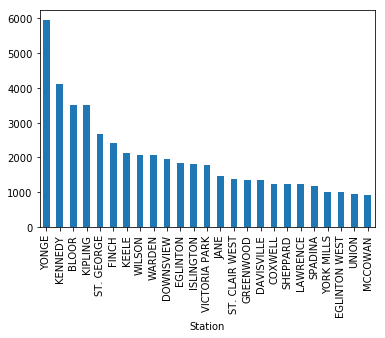

In [17]:
station_delay_count = ttc.groupby('Station').size()
sorted_delay_count = station_delay_count.sort_values(ascending=False)
sorted_delay_count[:25].plot.bar()
plt.show()

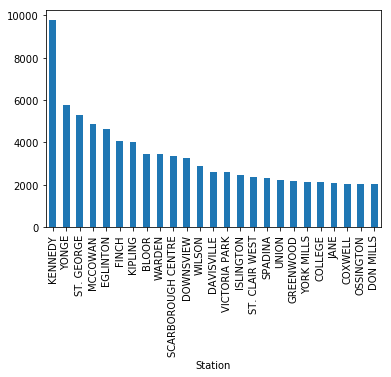

In [20]:
station_delay_total = ttc.groupby('Station')['Min Delay'].sum()
station_delay_total = station_delay_total.sort_values(ascending=False)
station_delay_total[:25].plot.bar()
plt.show()

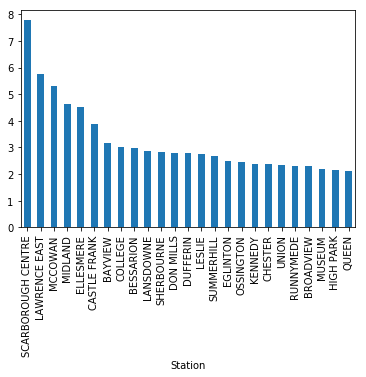

In [22]:
station_delay_average = ttc.groupby('Station')['Min Delay'].mean()
station_delay_average = station_delay_average.sort_values(ascending=False)
station_delay_average[:25].plot.bar()
plt.show()

In [32]:
station_summary = pd.DataFrame({'Count': station_delay_count, 'Total Delay': station_delay_total, 'Average Delay': station_delay_average})
station_summary.head()

,Average Delay,Count,Total Delay
BATHURST,1.751462,684,1198
BAY,2.051661,542,1112
BAYVIEW,3.170886,316,1002
BESSARION,2.978610,187,557
BLOOR,0.981213,3513,3447


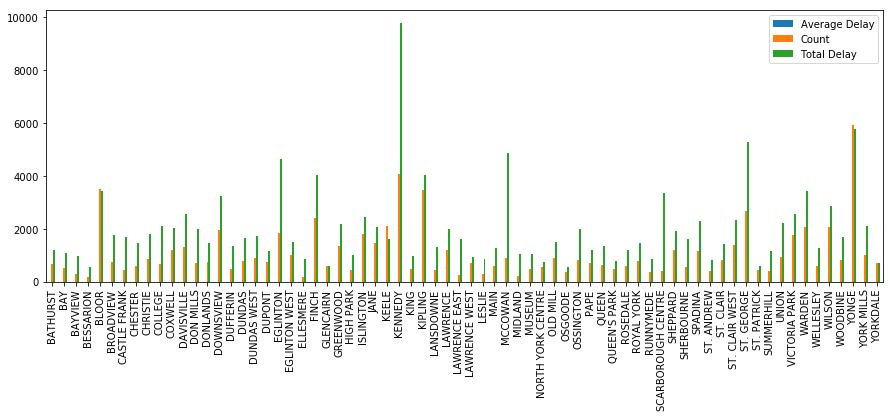

In [42]:
station_summary.plot.bar(figsize=(15,5))
plt.show()

In [ ]:
station_summary = station_summary.sort_values(by=['Total Delay', 'Count', 'Average Delay'], ascending=False)

**TODO** Break down by line
    

In [83]:
line_station = ttc[['Line', 'Station']]
line_station.groupby(['Station', 'Line']).size().unstack()


Line,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Station,,,,
BATHURST,680.0,NaN,NaN,NaN
BAY,536.0,NaN,NaN,2.0
BAYVIEW,NaN,NaN,316.0,NaN
BESSARION,NaN,NaN,186.0,1.0
BLOOR,1835.0,NaN,NaN,1634.0
BROADVIEW,770.0,NaN,NaN,1.0
CASTLE FRANK,443.0,NaN,NaN,NaN
CHESTER,628.0,NaN,NaN,NaN
CHRISTIE,884.0,NaN,NaN,1.0


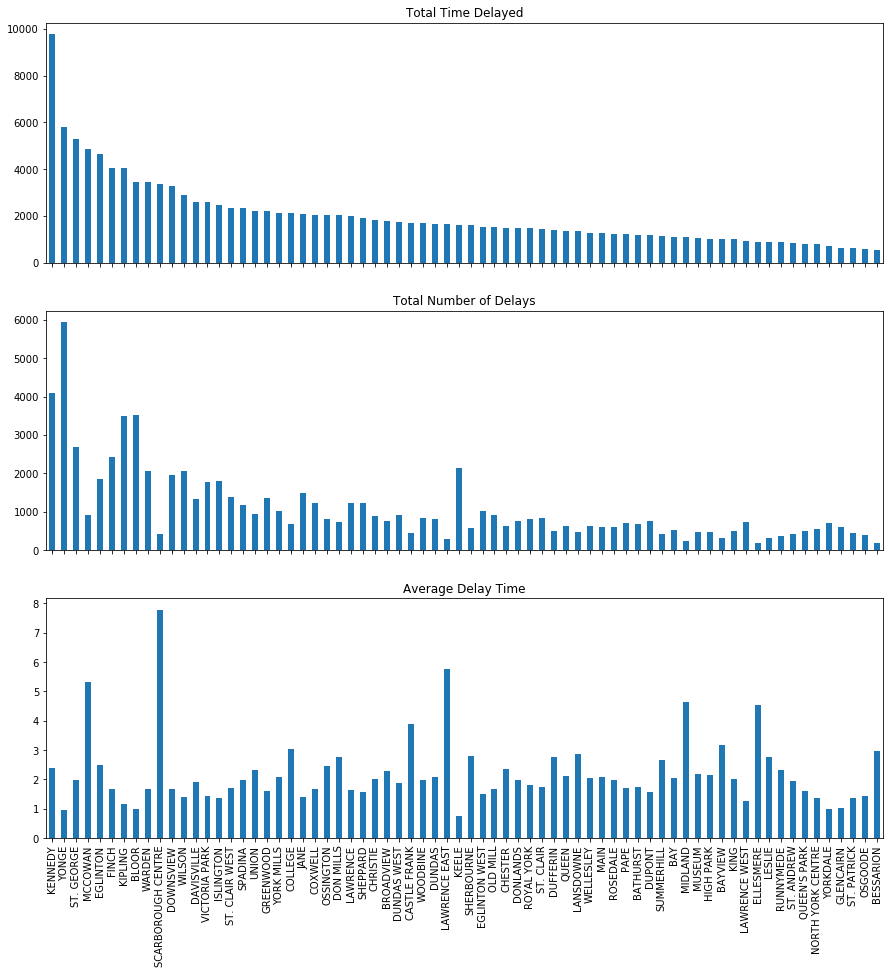

In [72]:
fix, ax = plt.subplots(3,1, figsize=(15,15), sharex=True)

station_summary['Total Delay'].plot.bar(ax=ax[0], title='Total Time Delayed')
station_summary['Count'].plot.bar(ax=ax[1], title='Total Number of Delays')
station_summary['Average Delay'].plot.bar(ax=ax[2], title='Average Delay Time')
plt.show()
